In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [3]:
num_obs=20
laliga_df=pd.read_csv("playerstats.csv",delimiter=',')
minutes_model = pd.DataFrame()
minutes_model = minutes_model.assign(minutes=laliga_df['Min'][0:num_obs])
minutes_model = minutes_model.assign(age=laliga_df['Age'][0:num_obs])
# Make an age squared column so we can fir polynomial model.
minutes_model = minutes_model.assign(age_squared=np.power(laliga_df['Age'][0:num_obs],2))


In [4]:
minutes_model

,minutes,age,age_squared
0,560,25.0,625.0
1,2260,29.0,841.0
2,1616,25.0,625.0
3,360,20.0,400.0
4,151,33.0,1089.0
5,9,21.0,441.0
6,2637,25.0,625.0
7,1844,28.0,784.0
8,124,17.0,289.0
9,516,23.0,529.0


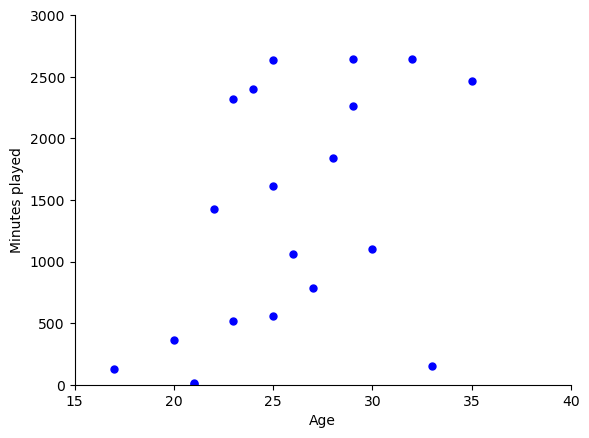

In [5]:
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
plt.show()

In [6]:
model_fit=smf.ols(formula='minutes  ~ age   ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params


                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.415
Date:                Tue, 06 Jun 2023   Prob (F-statistic):             0.0318
Time:                        22:30:44   Log-Likelihood:                -163.24
No. Observations:                  20   AIC:                             330.5
Df Residuals:                      18   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1293.0147   1152.158     -1.122      0.2

#### using scikit-learn library

In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y = minutes_model['minutes']
X = minutes_model[['age']]

In [13]:
# Create the model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Access the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [102.54037644]
Intercept: -1293.0146933819074


In [15]:
# Make predictions using the model
y_pred = model.predict(X)

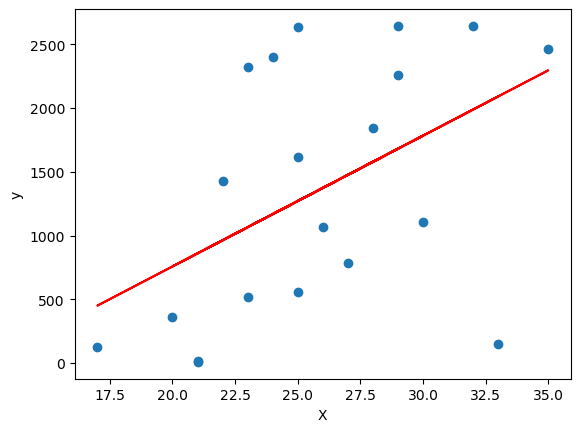

In [16]:
# Plot the scatter plot and the regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [17]:
# Calculate the residuals
residuals = y - y_pred

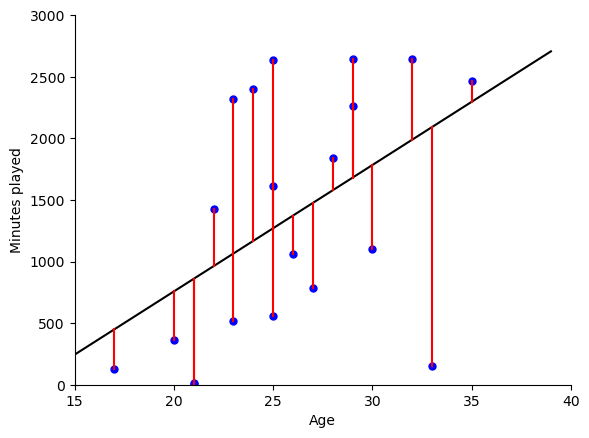

In [22]:
# Compare the fit
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x 
ax.plot(x, y, color='black')

for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a ], color='red')
plt.show()

#### Fitting quadtratic model

In [32]:
X = minutes_model[['age','age_squared']]
y = minutes_model['minutes']

In [33]:
# Create the model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Access the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [634.77215469 -10.14320291]
Intercept: -8063.582313150953


                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.559
Date:                Tue, 06 Jun 2023   Prob (F-statistic):             0.0512
Time:                        22:49:28   Log-Likelihood:                -162.38
No. Observations:                  20   AIC:                             330.8
Df Residuals:                      17   BIC:                             333.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8063.5823   5573.188     -1.447      

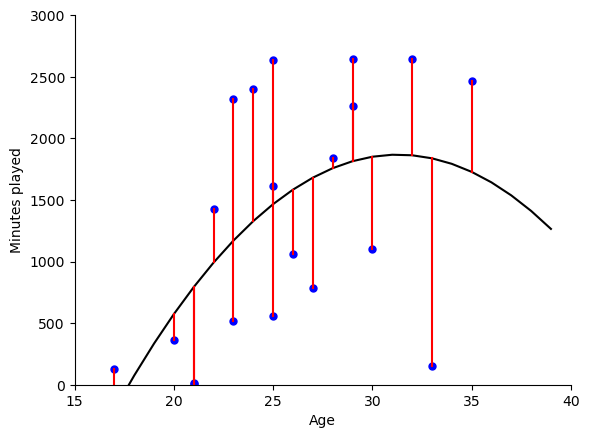

In [36]:
# First fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared  ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params


# Compare the fit
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')

for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
plt.show()

### Trying with all the data points

In [43]:
df = laliga_df[['Min','Age']]

In [44]:
df = df.assign(age_squared=np.power(laliga_df['Age'],2))


                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     51.35
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.41e-21
Time:                        22:58:00   Log-Likelihood:                -5057.4
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5255.8833    951.226     -5.525      

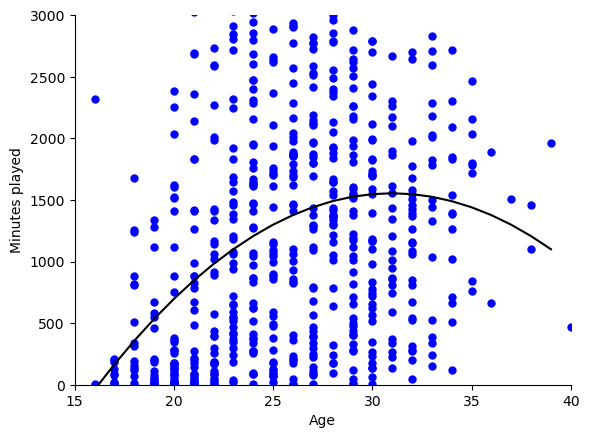

In [47]:
# First fit the model
model_fit=smf.ols(formula='Min  ~ Age + age_squared  ', data=df).fit()
print(model_fit.summary())
b=model_fit.params


# Compare the fit
fig,ax=plt.subplots(num=1)
ax.plot(df['Age'], df['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')


#### adding a cubic term

In [49]:
column_names = laliga_df.columns.tolist()

In [50]:
column_names

['Rk',
 'Player',
 'Nation',
 'Pos',
 'Squad',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'Gls.1',
 'Ast.1',
 'G+A',
 'G-PK.1',
 'G+A-PK',
 'xG',
 'npxG',
 'xA',
 'npxG+xA',
 'xG.1',
 'xA.1',
 'xG+xA',
 'npxG.1',
 'npxG+xA.1',
 'Matches',
 '-9999']

In [52]:
laliga_df[['Starts']]

,Starts
0,6
1,26
2,17
3,4
4,2
...,...
612,14
613,8
614,8
615,19


In [53]:
df = df.assign(Starts=np.power(laliga_df['Starts'],3))


In [54]:
df

,Min,Age,age_squared,Starts
0,560,25.0,625.0,216
1,2260,29.0,841.0,17576
2,1616,25.0,625.0,4913
3,360,20.0,400.0,64
4,151,33.0,1089.0,8
...,...,...,...,...
612,1172,29.0,841.0,2744
613,1166,22.0,484.0,512
614,645,23.0,529.0,512
615,1648,24.0,576.0,6859


                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     856.5
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          1.57e-218
Time:                        23:00:55   Log-Likelihood:                -4597.4
No. Observations:                 616   AIC:                             9203.
Df Residuals:                     612   BIC:                             9221.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1860.6532    457.178     -4.070      

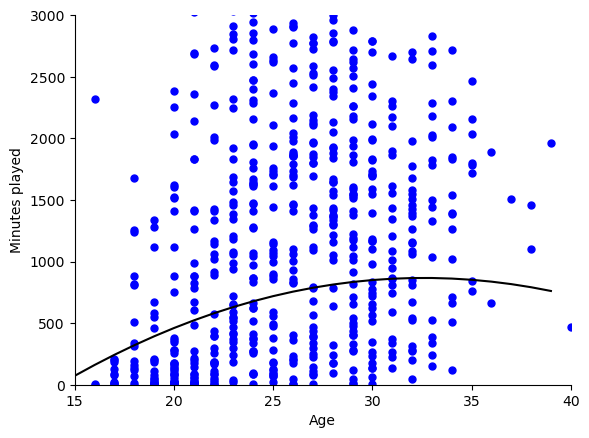

In [55]:
# First fit the model
model_fit=smf.ols(formula='Min  ~ Age + age_squared + Starts', data=df).fit()
print(model_fit.summary())
b=model_fit.params


# Compare the fit
fig,ax=plt.subplots(num=1)
ax.plot(df['Age'], df['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x + b[3]
ax.plot(x, y, color='black')